In [ ]:
import pandas as pd

In [ ]:
import json
from tqdm import tqdm
import bz2
import regex as re
from scipy import sparse
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


%matplotlib inline

#Загружаем и открываем данные

In [5]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [02:37, 1280.38it/s]


In [6]:
responses[50]

{'city': 'г. Новочеркасск',
 'rating_not_checked': False,
 'title': 'отзыв',
 'num_comments': 1,
 'bank_license': 'лицензия № 1792',
 'author': '07092008',
 'bank_name': 'Русфинанс Банк',
 'datetime': '2015-06-08 11:18:41',
 'text': 'Добрый день, хочу написать свой отзыв о работе банка. Мне пришлось столкнуться с неприятностью. Выплатив кредит полностью, я явилась в офис банка в г. Ростов-на- Дону, ул.Театральная 60., получила на руки справку о погашении задолжености, следующим шагом моим было изъявление желания о закрытии счета, но оказалось, что на счете имеется переплата в 90 копеек,я написала заявление о зачислении денег на счет банка, для того чтобы наконец то получить справку о закрытии моего счета, это было 22 мая 2015 года, 08.06.2015г. мной был сделан звонок в банк с целью выяснения, почему так долго списывается сумма в 90 копеек с моего счета и когда же наконец я его закрою, на что был получен ответ, что 90 копеек там еще до сих пор висят,  сколько можно ждать, простой формал

In [8]:
data = pd.DataFrame(list(responses), columns = ['city', 'rating_not_checked', 'title', 'num_comments', 'bank_licence', 'author', 'bank_name', 'datetime', 'text', 'rating_grade'])

#Анализ текстов


In [9]:
data['city'].value_counts()

г. Москва                               55354
г. Санкт-Петербург                      14342
г. Екатеринбург                          2337
г. Новосибирск                           2300
г. Нижний Новгород                       1976
                                        ...  
г. г.Калуга                                 1
г. ВЕЛИКИЕ ЛУКИ                             1
г. всеволожск                               1
г. сейчас                                   1
г. Краснодарский край, ст.Павловская        1
Name: city, Length: 5823, dtype: int64

In [10]:
data['bank_name'].value_counts()

Сбербанк России     26327
Альфа-Банк          10224
ВТБ 24               8185
Русский Стандарт     7943
Хоум Кредит Банк     7549
                    ...  
Сиббизнесбанк           1
Донбанк                 1
Потенциал               1
Ури Банк                1
БайкалИнвестБанк        1
Name: bank_name, Length: 670, dtype: int64

In [11]:
data.text = data.text.astype(str)
data['count_words'] = data['text'].str.split(" ").apply (lambda x: len(x))

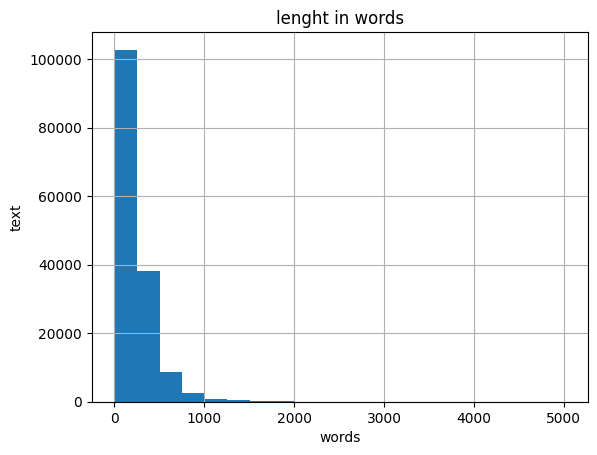

In [12]:
data['count_words'].hist(bins=20)
plt.title('lenght in words')
plt.xlabel('words')
plt.ylabel('text')
plt.show()

In [13]:
data['count_sym'] = data['text'].apply (len)

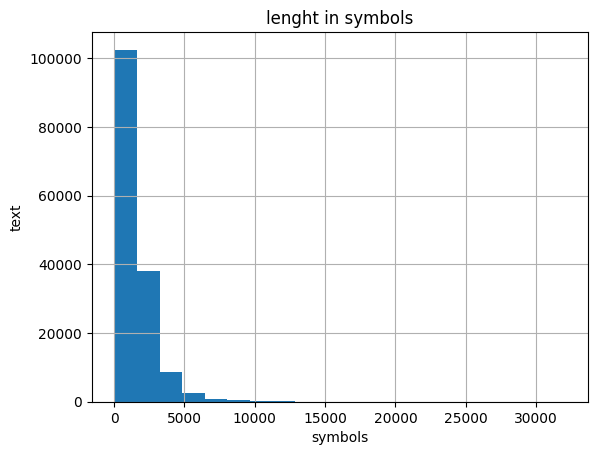

In [14]:
data['count_sym'].hist(bins=20)
plt.title('lenght in symbols')
plt.xlabel('symbols')
plt.ylabel('text')
plt.show()

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=2d74c6c177323292c685452c808565f76ee0449a6f2b82c81c1c78e28c022547
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [17]:
import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [18]:
from string import punctuation
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
voc1 = [token for text in data['text'][:10000] for token in word_tokenize(text.lower())if token not in punctuation]
freq = FreqDist(voc1)

In [20]:
freq.most_common(10)

[('в', 74867),
 ('и', 60531),
 ('не', 49674),
 ('на', 41028),
 ('что', 35465),
 ('я', 33397),
 ('с', 27774),
 ('по', 22361),
 ('мне', 19029),
 ('банка', 16675)]

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stop_list = stopwords.words('russian') + list(punctuation) + ['``', "''", '...' ]  + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', 'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой']

voc2 = [token for text in data.text[:10000] for token in word_tokenize(text.lower())if token not in stop_list]
freq1 = FreqDist(voc2)

In [28]:
freq1.most_common(10)

[('банка', 16675),
 ('банк', 12868),
 ('деньги', 6986),
 ('карты', 5964),
 ('карту', 5618),
 ('день', 4711),
 ('кредит', 4631),
 ('заявление', 3933),
 ('банке', 3776),
 ('года', 3694)]

In [29]:
lem = []
for token in tqdm(voc2):
    lem.append(m.parse(token)[0].normal_form)

100%|██████████| 1354041/1354041 [05:34<00:00, 4044.01it/s]


In [30]:
freq_lem = FreqDist(lem)
freq_lem.most_common(10)

[('банк', 39255),
 ('карта', 18713),
 ('мой', 11135),
 ('день', 10002),
 ('кредит', 9710),
 ('деньга', 9480),
 ('сотрудник', 9347),
 ('клиент', 7789),
 ('счёт', 7742),
 ('который', 7122)]

In [31]:
noun = []
for w in tqdm(lem):
    p = m.parse(w)[0]
    if 'NOUN' in p.tag:
        noun.append(w)


100%|██████████| 1354041/1354041 [04:27<00:00, 5064.16it/s]


In [32]:
freq_noun = FreqDist(noun)
freq_noun.most_common(10)

[('банк', 39255),
 ('карта', 18713),
 ('день', 10002),
 ('кредит', 9710),
 ('деньга', 9480),
 ('сотрудник', 9347),
 ('клиент', 7789),
 ('счёт', 7742),
 ('сумма', 6980),
 ('отделение', 6887)]

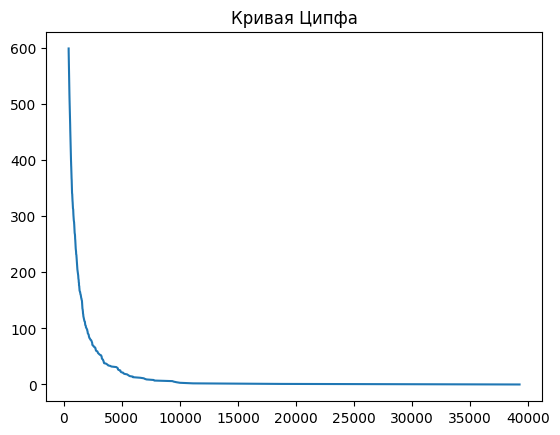

In [33]:
freq_list = list(freq_lem.values())
freq_list = sorted(freq_list, reverse = True)

fig, ax = plt.subplots()
ax.plot(freq_list[:600], range(600))
plt.title('Кривая Ципфа')
plt.show()

In [34]:
from collections import Counter
words = []
tokenizer = []
tokens = []
count = Counter()
for row in data['text'][:10000]:
    tokens = word_tokenize(row)
    count.update([token for token in tokens if token not in punctuation])
    words.append(len(count))
    tokenizer.append(sum(count.values()))

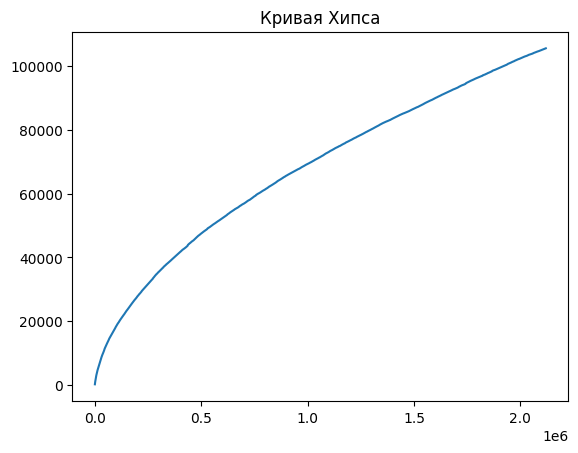

In [35]:
fig, ax = plt.subplots()
ax.plot(tokenizer, words)
plt.title ('Кривая Хипса')
plt.show()


In [36]:
emp = freq_lem['сотрудник']
cl = freq_lem['клиент']
if emp > cl:
    print(f'"сотрудник" встречается чаще {emp} > {cl}')
elif emp < cl:
    print(f'"клиент" встречается чаще {emp} < {cl}')
else:
    print(f'Оба слова встречаются одинаково {emp} = {cl}')


"сотрудник" встречается чаще 9347 > 7789


In [37]:
print(freq_lem['мошенничество'])
print(freq_lem['доверие'])


219
151


In [38]:
data1 =  data[data['rating_grade'].isin([1])]

In [39]:
texts = []
for text in data1['text'][:10000]:
    s = ''
    for token in word_tokenize(text.lower()):
        if token not in stop_list:
            s += m.parse(token)[0].normal_form + ' '
    texts.append(s)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2))
tfidf_texts = tfidf.fit_transform(texts)

In [41]:
import numpy as np

mean_w = np.argsort(tfidf_texts.mean(axis=0).tolist()[0])
print(tfidf.get_feature_names_out()[mean_w[-30:]])
print(tfidf.get_feature_names_out()[mean_w[:30]])

['банкомат' 'ваш' 'мочь' 'средство' 'кредитный' 'ответ' 'получить'
 'вопрос' 'номер' 'год' '2014' 'офис' 'платёж' 'договор' 'который'
 'сбербанк' 'сумма' 'клиент' 'сказать' 'заявление' 'вклад' 'счёт' 'мой'
 'сотрудник' 'день' 'отделение' 'кредит' 'деньга' 'карта' 'банк']
['успешно проделать' 'процедура оспаривание' 'оплата скрин'
 '14 проинформировать' 'москва утверждать' 'москва устроить' 'ход менять'
 'москва соблюсти' 'москва случай' '14 сайт' 'датировать 30'
 'четыре другой' 'москва привести' 'лишь электронный'
 'предоставить способ' 'лишь надеяться' 'октябрь лишь' 'память совершать'
 'низзить приблизительно' '4154843' '4154843 08' 'зависимость качество'
 'москва отписываться' 'основание следующий' 'москва особо' 'низзить'
 'присутствовать операция' 'first' 'first made' 'москва лаповый']


In [42]:
data5 = data[data['rating_grade'].isin([5])]

In [43]:
texts5 = []
for text in data5['text'][:10000]:
    s = ''
    for token in word_tokenize(text.lower()):
        if token not in stop_list:
            s += m.parse(token)[0].normal_form + ' '
    texts5.append(s)

In [44]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))
tfidf_texts = tfidf.fit_transform(texts5)

In [45]:
mean_w = np.argsort(tfidf_texts.mean(axis=0).tolist()[0])
print(tfidf.get_feature_names_out()[mean_w[-30:]])
print(tfidf.get_feature_names_out()[mean_w[:30]])

['интернет' 'такой' 'получить' 'то' 'кредитный' 'хотеть' 'сказать' 'свой'
 'документ' 'проблема' 'спасибо' 'обслуживание' 'который' 'работа' 'время'
 'счёт' 'год' 'вопрос' 'мой' 'офис' 'деньга' 'день' 'клиент' 'сотрудник'
 'отделение' 'очень' 'кредит' 'вклад' 'карта' 'банк']
['банк24 маштакова' 'информация ведущий' 'услуга банка24'
 'запросить большой' 'час подать' 'переговорить специалист' '40 52'
 '26 49' 'информация познакомиться' 'запросить рассмотрение'
 'обращаться 08' 'требовать уточнить' '18 мочь' 'gracecard получение'
 'gracecard' 'говорить миг' 'филиал маштакова' 'разный сказать' 'гревцева'
 'обратиться банк24' 'говорить упорно' '26 поднятие' '07 переговорить'
 'оформление обычный' 'подключение миг24' 'внимание действительно'
 '000 давно' 'сразу уточнять' 'общаться отдельный' 'адрес дату']


In [47]:
from gensim.corpora import Dictionary
from gensim.models import LsiModel
from gensim import similarities
from gensim.models import LdaModel

#Строим тематические модели

In [48]:
from tqdm import tqdm

texts_model = []
for text in tqdm(data['text'][:10000]):
    s = []
    for token in word_tokenize(text.lower()):
        if token not in stop_list:
            s.append(m.parse(token)[0].normal_form)
            s.append(token)
    texts_model.append(s)

100%|██████████| 10000/10000 [05:03<00:00, 32.93it/s]


In [49]:
dictionary = Dictionary(texts_model)
corpus = [dictionary.doc2bow(text) for text in texts_model ]

In [50]:
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=30)

In [51]:
lda.show_topics(5)

[(19,
  '0.023*"банкомат" + 0.021*"сумма" + 0.015*"банк" + 0.010*"кредит" + 0.010*"рублей" + 0.009*"рубль" + 0.009*"погашение" + 0.009*"деньга" + 0.008*"000" + 0.007*"сумму"'),
 (9,
  '0.011*"пристав" + 0.010*"арест" + 0.009*"постановление" + 0.009*"яндекс" + 0.009*"банк" + 0.005*"43" + 0.005*"судебный" + 0.005*"шаблон" + 0.004*"производство" + 0.004*"счёт"'),
 (25,
  '0.012*"банк" + 0.007*"уэк" + 0.006*"990" + 0.005*"день" + 0.005*"вклад" + 0.004*"карта" + 0.004*"номер" + 0.004*"отделение" + 0.003*"сбербанк" + 0.003*"деньга"'),
 (16,
  '0.006*"банк" + 0.004*"отрадный" + 0.003*"отрадное" + 0.003*"гость" + 0.002*"банка" + 0.002*"торговля" + 0.002*"кристина" + 0.002*"карта" + 0.002*"данный" + 0.002*"типичный"'),
 (17,
  '0.021*"банк" + 0.020*"вклад" + 0.012*"офис" + 0.006*"отделение" + 0.006*"очередь" + 0.006*"очень" + 0.006*"банка" + 0.005*"деньга" + 0.005*"время" + 0.005*"день"')]

Здесь достаточно хорошо можно интерпретировать темы карт, кредитов, вкладов и работы отделений банков

In [52]:
lsi = LsiModel(corpus=corpus, id2word=dictionary, num_topics=50)

In [53]:
lsi.show_topics(5)

[(0,
  '0.600*"банк" + 0.233*"карта" + 0.185*"банка" + 0.160*"кредит" + 0.141*"день" + 0.140*"«" + 0.140*"»" + 0.129*"сотрудник" + 0.125*"мой" + 0.122*"заявление"'),
 (1,
  '-0.577*"»" + -0.573*"«" + 0.295*"карта" + -0.186*"договор" + -0.130*"кредит" + -0.125*"ооо" + 0.083*"банк" + -0.082*"рф" + 0.079*"карту" + 0.079*"день"'),
 (2,
  '0.639*"карта" + -0.369*"банк" + -0.322*"кредит" + 0.252*"«" + 0.251*"»" + 0.185*"карты" + 0.154*"карту" + 0.120*"сбербанк" + -0.113*"договор" + 0.097*"отделение"'),
 (3,
  '-0.547*"банк" + 0.480*"кредит" + -0.212*"вклад" + 0.164*"сотрудник" + 0.151*"отделение" + 0.141*"заявление" + 0.124*"сумма" + 0.119*"день" + 0.114*"сбербанк" + 0.103*"кредита"'),
 (4,
  '0.485*"вклад" + -0.400*"карта" + -0.282*"кредит" + 0.230*"день" + -0.215*"банк" + 0.209*"деньга" + 0.160*"отделение" + 0.158*"деньги" + -0.147*"кредитный" + 0.127*"вклада"')]

In [54]:
for i in range(50):
    for x in lsi.show_topic(topicno=i, topn=10):
        if x[0] in ['сбербанк', 'тинькофф', 'втб']:
            print('topic =', i, x)

topic = 2 ('сбербанк', 0.12048752709233732)
topic = 3 ('сбербанк', 0.11382102171353559)
topic = 6 ('сбербанк', 0.14277641073931005)
topic = 9 ('сбербанк', -0.23423988303180435)
topic = 11 ('сбербанк', 0.4529457926873321)
topic = 13 ('сбербанк', 0.20266899172909617)
topic = 14 ('сбербанк', -0.14539340473627183)
topic = 15 ('сбербанк', 0.22740925456065367)
topic = 16 ('сбербанк', -0.423566871937387)


#Классификация текстов

In [55]:
data_class = pd.concat([data1.iloc[:5000], data5.iloc[:5000]])



In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data_class.text, data_class.rating_grade, train_size=0.7, random_state=42, stratify = data_class.rating_grade)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000,), (3000,), (7000,), (3000,))

In [58]:
mystopwords = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой'
]
ru_words = re.compile("[А-Яа-я]+")


def words_only(text):
    return " ".join(ru_words.findall(text))

def lemmatize(text, mystem=m):
    try:
        return " ".join([m.parse(w)[0].normal_form for w in text.split(' ')]).strip()
    except:
        return " "

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""


def preprocess(text):
    return remove_stopwords(lemmatize(words_only(text.lower())))

In [59]:
X_train = X_train.apply(preprocess)
X_train

35298    хотеться поставить очень высокий положительный...
9580     го март зайти невский нужно воспользоваться пе...
10826    попытаться пополнить счёт дебетовый карта отде...
6739     добрый день являться ваш заёмщик ипотечный кре...
10230    год приобрести магазин товар кредит банк сетел...
                               ...                        
34816    здравствуйте хотеть оставить положительный отз...
6895     осторожный открывать вклад хоум кредит банк ма...
76198    невнимательность карта банк карман уйти технич...
13915    смотреть акция пройти идентификация офис получ...
769      прояснить ситуация опм банк иметь вклад рублёв...
Name: text, Length: 7000, dtype: object

In [60]:
X_test = X_test.apply(preprocess)
X_test

24907    год иметь кредитка небольшой лимит текущий рас...
42668    здравствуйте возникнуть острый необходимость п...
13410    история январь депозитный счёт неправомерно уд...
44555    добрый время весь посетитель сегодня решить по...
56448    решить воспользоваться спец предложение портал...
                               ...                        
5563     пользоваться недавний время услуга банк начисл...
75073    филиал оао бинбанк санкт петербург парк победа...
6706     добрый вечер начать далёкий апрель год мобильн...
26533    компания протяжение несколько год являться кли...
8158     оформлять офис пластиковый карта пользование р...
Name: text, Length: 3000, dtype: object

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.metrics  import classification_report


In [62]:
X_train[:5]

35298    хотеться поставить очень высокий положительный...
9580     го март зайти невский нужно воспользоваться пе...
10826    попытаться пополнить счёт дебетовый карта отде...
6739     добрый день являться ваш заёмщик ипотечный кре...
10230    год приобрести магазин товар кредит банк сетел...
Name: text, dtype: object

In [63]:
dic = [((1, 1)), ((2, 2)), ((3, 3))]
for i in dic:
   clf = Pipeline([
        ('vect', CountVectorizer(ngram_range = i)),
        ('tfidf', TfidfTransformer()),
        ('tm', TruncatedSVD()),
        ('clf', RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=2, random_state=0))
    ])
   clf.fit(X_train, y_train)
   pred = clf.predict(X_test)
   print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       0.80      0.73      0.76      1643
         5.0       0.70      0.78      0.74      1357

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.76      0.75      0.75      3000

              precision    recall  f1-score   support

         1.0       0.80      0.81      0.80      1495
         5.0       0.81      0.80      0.81      1505

    accuracy                           0.81      3000
   macro avg       0.80      0.81      0.80      3000
weighted avg       0.81      0.81      0.81      3000

              precision    recall  f1-score   support

         1.0       0.80      0.51      0.62      2352
         5.0       0.23      0.53      0.32       648

    accuracy                           0.51      3000
   macro avg       0.51      0.52      0.47      3000
weighted avg       0.68      0.51      0.56      3000



Tf-idf  преобразование и сингулярное разложение показывает довольно высокий результат на биграммах

In [64]:
dic = [((1, 1)), ((2, 2)), ((3, 3))]
for i in dic:
   clf = Pipeline([
        ('vect', CountVectorizer(ngram_range = i)),
        ('tfidf', TfidfTransformer()),
        ('lda', LatentDirichletAllocation()),
        ('clf', RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=2, random_state=0))
      ])
   clf.fit(X_train, y_train)
   pred = clf.predict(X_test)
   print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       0.65      0.52      0.58      1893
         5.0       0.39      0.53      0.45      1107

    accuracy                           0.52      3000
   macro avg       0.52      0.53      0.52      3000
weighted avg       0.56      0.52      0.53      3000

              precision    recall  f1-score   support

         1.0       0.96      0.51      0.66      2851
         5.0       0.06      0.60      0.11       149

    accuracy                           0.51      3000
   macro avg       0.51      0.55      0.39      3000
weighted avg       0.92      0.51      0.63      3000

              precision    recall  f1-score   support

         1.0       0.99      0.50      0.67      2981
         5.0       0.01      0.58      0.01        19

    accuracy                           0.50      3000
   macro avg       0.50      0.54      0.34      3000
weighted avg       0.99      0.50      0.66      3000



LDA в данном случае работает хуже